This notebook is identical to the Regression_Analysis_NHL_2023_2024_Dataset.ipynb but is restricted to data from the 2021-2022 NHL season.

Install the required libraries.

In [1]:
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Read in the data from the NHL_PenaltyKilling_2023_24.csv.

In [2]:
import pandas

# Read data from a .csv file
dataframe_2021_22 = pandas.read_csv('NHL_PenaltyKilling_2021_22.csv')

# Print the first few rows of the .csv file as a sanity check
print(dataframe_2021_22.head())

              Team  Save %  Skating Distance Penalty Killing (Total)  \
0    Anaheim Ducks   0.907                                    300.98   
1  Arizona Coyotes   0.897                                    314.18   
2    Boston Bruins   0.913                                    365.07   
3   Buffalo Sabres   0.899                                    301.27   
4   Calgary Flames   0.918                                    363.04   

   Skating Distance Penalty Killing (per 60)  \
0                                       5.71   
1                                       5.37   
2                                       7.07   
3                                       6.07   
4                                       6.33   

   Skating Distance Penalty Killing (per PIM)  Penalty Kill %  \
0                                    0.396548            80.8   
1                                    0.374024            75.0   
2                                    0.451261            81.3   
3                 

Perform the regression analysis. We jump straight to the regression with the four parameters: Save %, Distance Skating Penalty Killing (per PIM), SA/GP, and PP%.
These parameters are from the initial regression analysis performed on the full dataset in Regression_Analysis_NHL_Full_Dataset.ipynb after removing predictors that were causing multicollinearity problems.

In [3]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = dataframe_2021_22[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP' , 'PP%']]
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5.326
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00270
Time:                        18:36:51   Log-Likelihood:                -76.446
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      27   BIC:                             170.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We still get a warning about multicollinearity, likely due to the constant again. We can calculate the VIF values to confirm this.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables
X = dataframe_2021_22[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP' , 'PP%']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pandas.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF data
print(vif_data)

                                     Variable           VIF
0                                       const  19971.356966
1                                      Save %      1.809082
2  Skating Distance Penalty Killing (per PIM)      1.179988
3                                       SA/GP      1.215914
4                                         PP%      1.833765


Much like what was done with the full dataset, we can rerun the regression analysis with the predictors


1.   Centered
2.   Standardized



Regression analysis with centered predictors.

In [5]:
# Define the dependent and independent variables
# Center the dependent variables
X_centered = dataframe_2021_22[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'PP%']].apply(lambda x: x - x.mean())
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the centered predictors
X_centered = sm.add_constant(X_centered)

# Fit the regression model with centered predictors
model_centered = sm.OLS(y, X_centered).fit()

# Print the summary of the regression model
print(model_centered.summary())


                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5.326
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00270
Time:                        18:36:59   Log-Likelihood:                -76.446
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      27   BIC:                             170.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Regresion analysis with standardized predictors.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_standardized = scaler.fit_transform(dataframe_2021_22[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'PP%']])

# Convert the standardized predictors back to a DataFrame
X_standardized = pandas.DataFrame(X_standardized, columns=['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'PP%'])

# Add a constant to the standardized predictors
X_standardized = sm.add_constant(X_standardized)

# Fit the regression model with standardized predictors
model_standardized = sm.OLS(y, X_standardized).fit()

# Print the summary of the regression model
print(model_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5.326
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00270
Time:                        18:37:04   Log-Likelihood:                -76.446
No. Observations:                  32   AIC:                             162.9
Df Residuals:                      27   BIC:                             170.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Again, as was done with the full dataset, we will run some simple regression analysis for each of the four predicotrs.

Starting with Save %.

In [7]:
# Define the dependent and independent variables
X = dataframe_2021_22['Save %']
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     12.74
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00123
Time:                        18:37:12   Log-Likelihood:                -80.090
No. Observations:                  32   AIC:                             164.2
Df Residuals:                      30   BIC:                             167.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.1473     57.024     -2.177      0.0

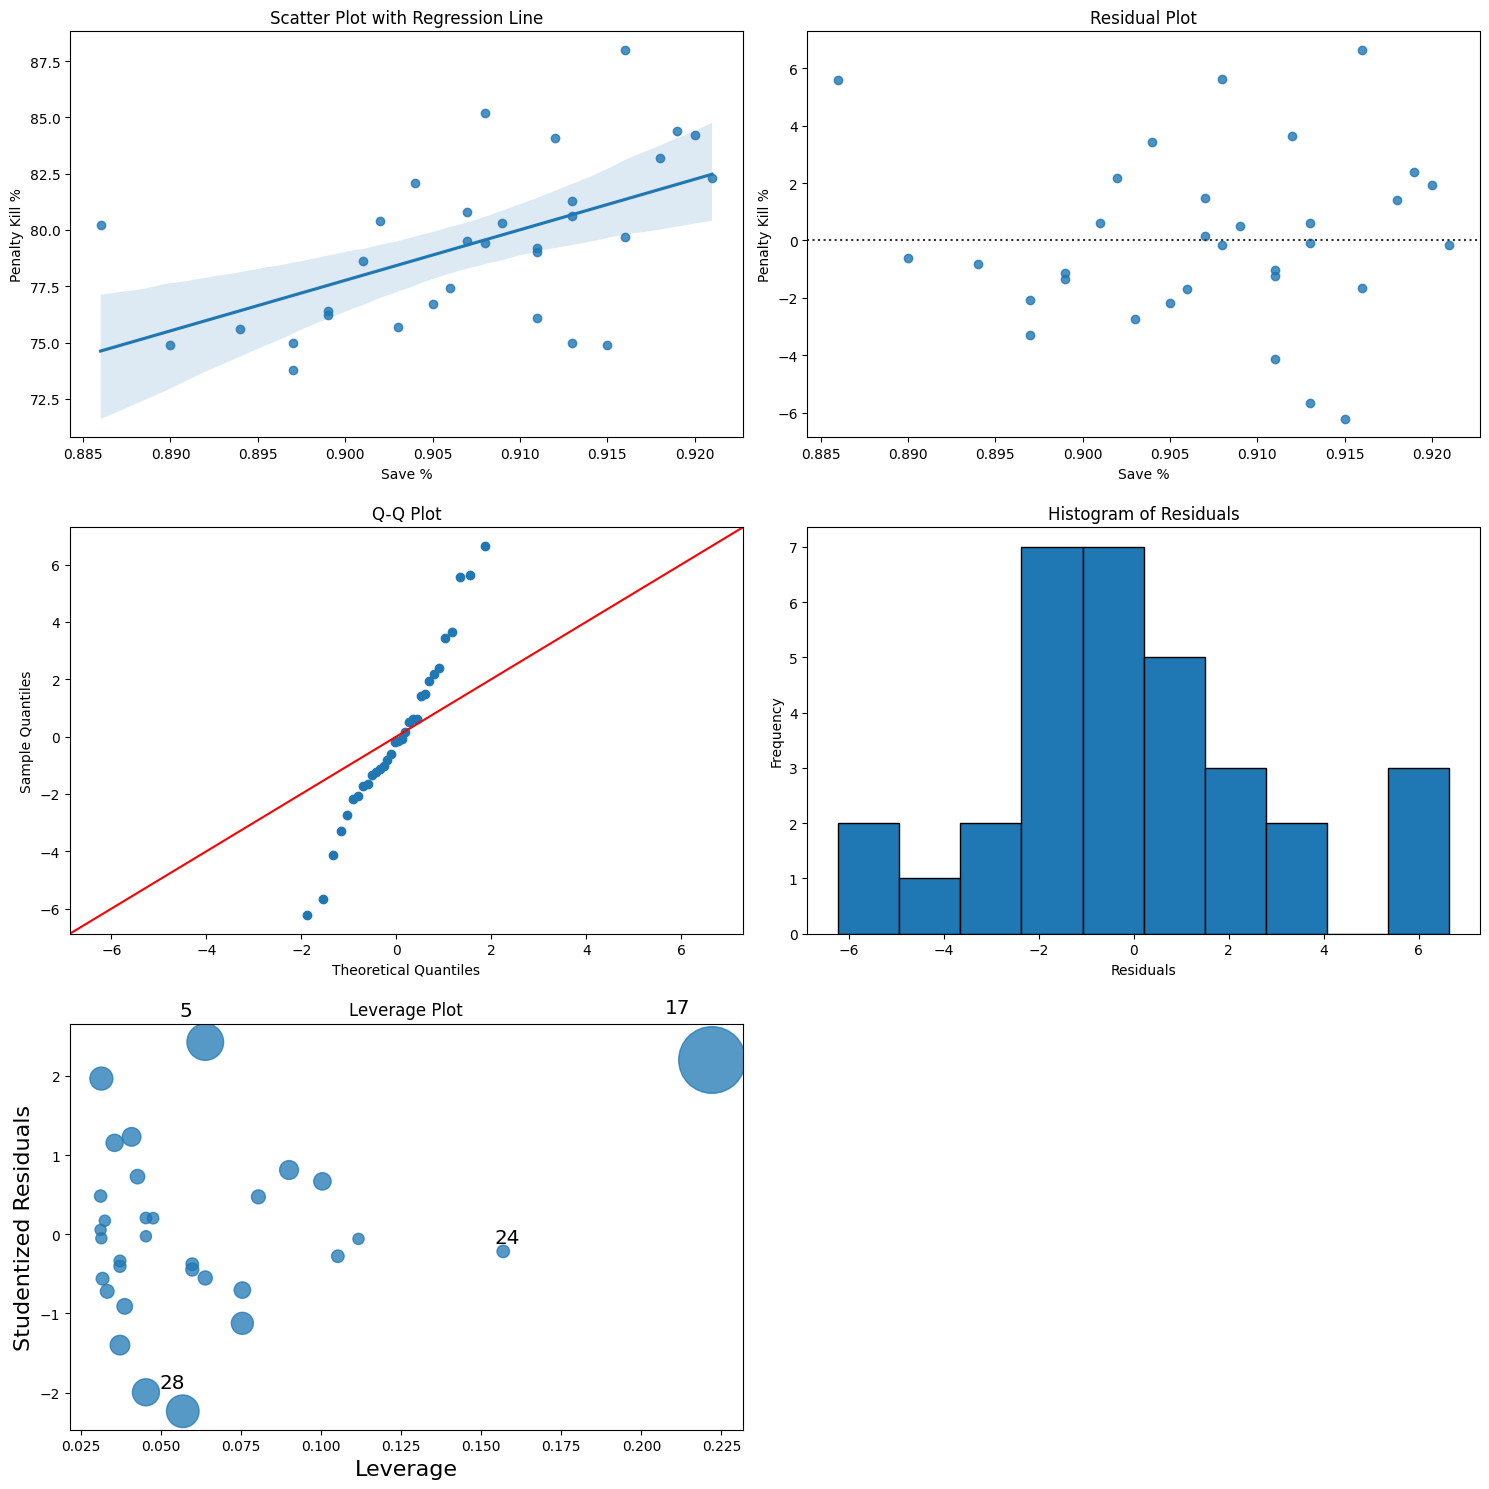

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Skating Distance Penalty Killing (per PIM) simple regression.

In [9]:
# Define the dependent and independent variables
X = dataframe_2021_22['Skating Distance Penalty Killing (per PIM)']
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.743
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0230
Time:                        18:37:28   Log-Likelihood:                -82.951
No. Observations:                  32   AIC:                             169.9
Df Residuals:                      30   BIC:                             172.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

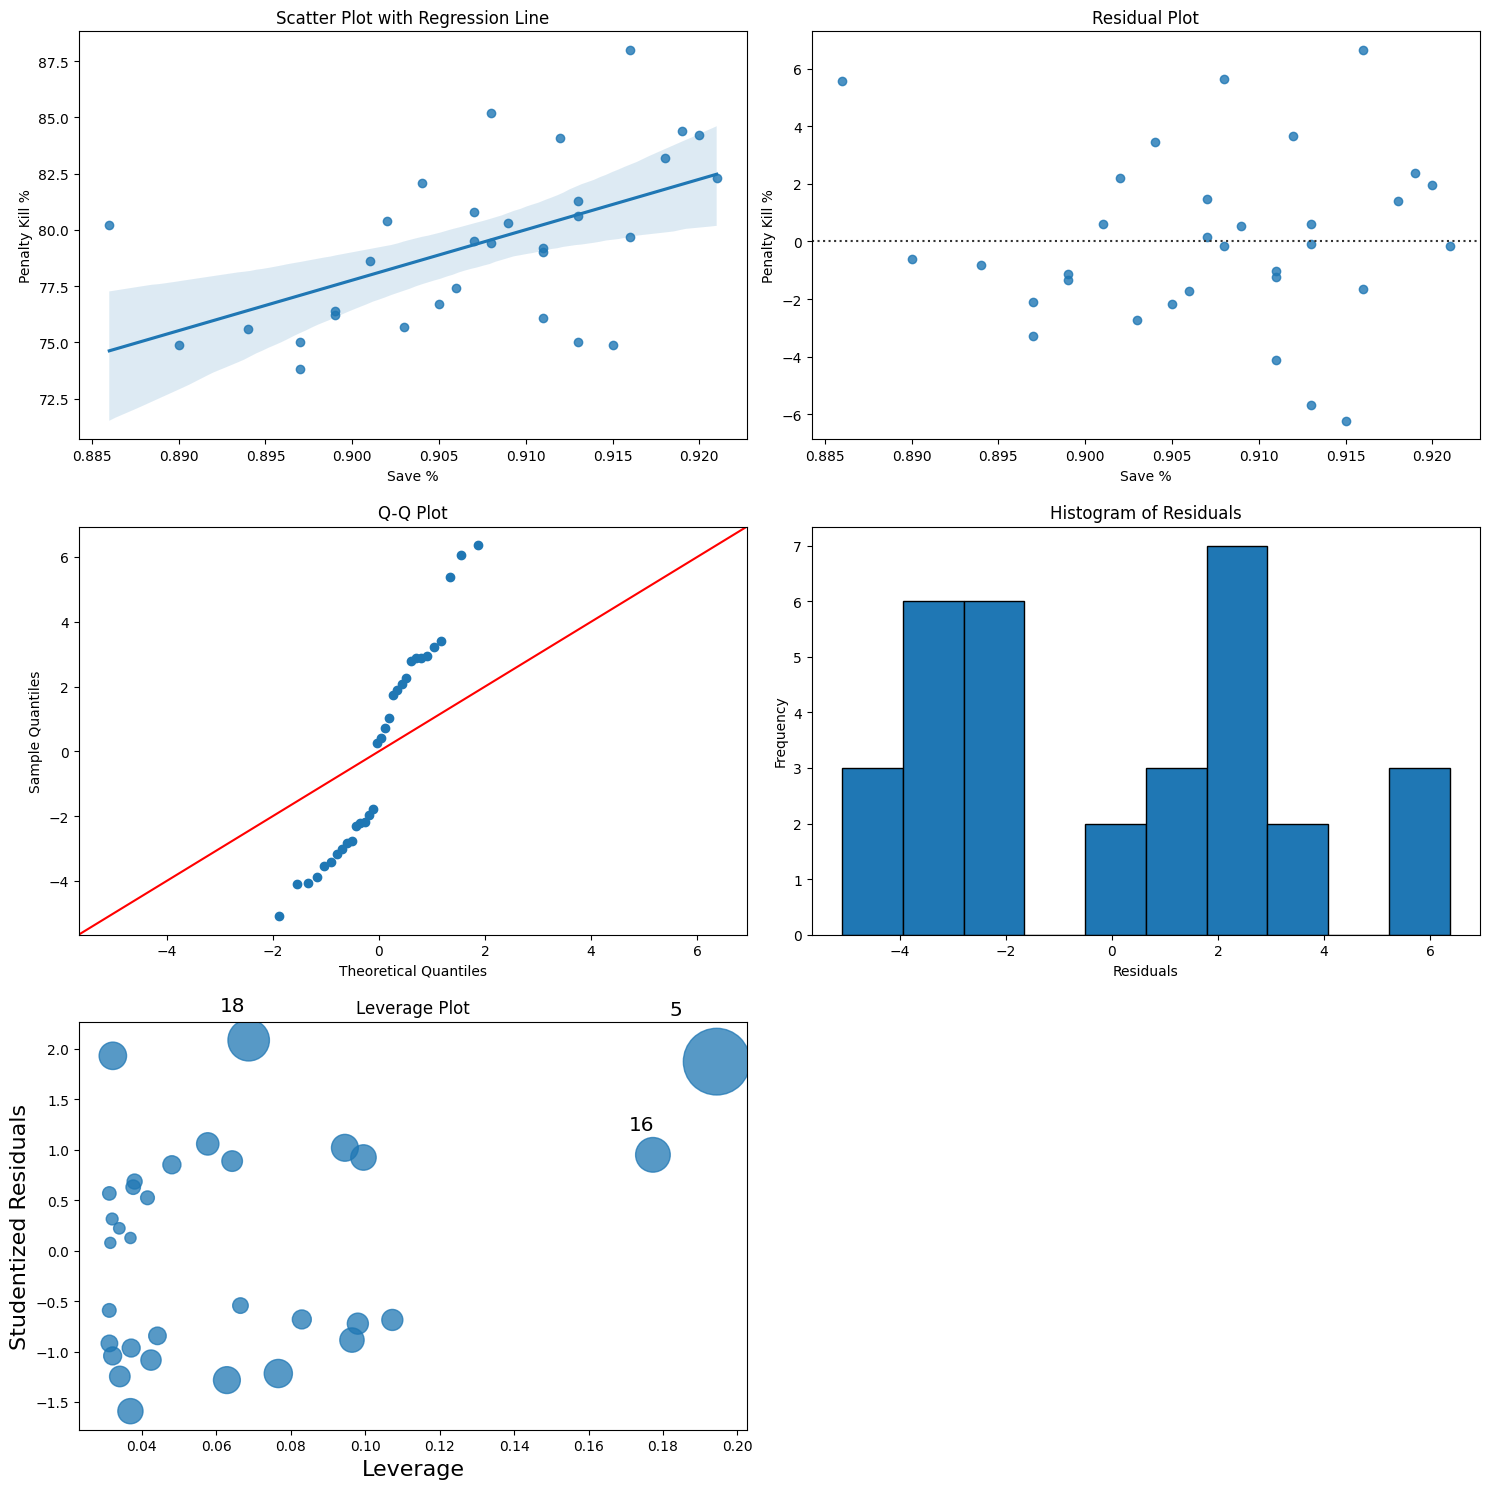

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

SA/GP simple regression.

In [11]:
# Define the dependent and independent variables
X = dataframe_2021_22['SA/GP']
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     5.994
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0204
Time:                        18:37:52   Log-Likelihood:                -82.839
No. Observations:                  32   AIC:                             169.7
Df Residuals:                      30   BIC:                             172.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.8939      9.622     10.694      0.0

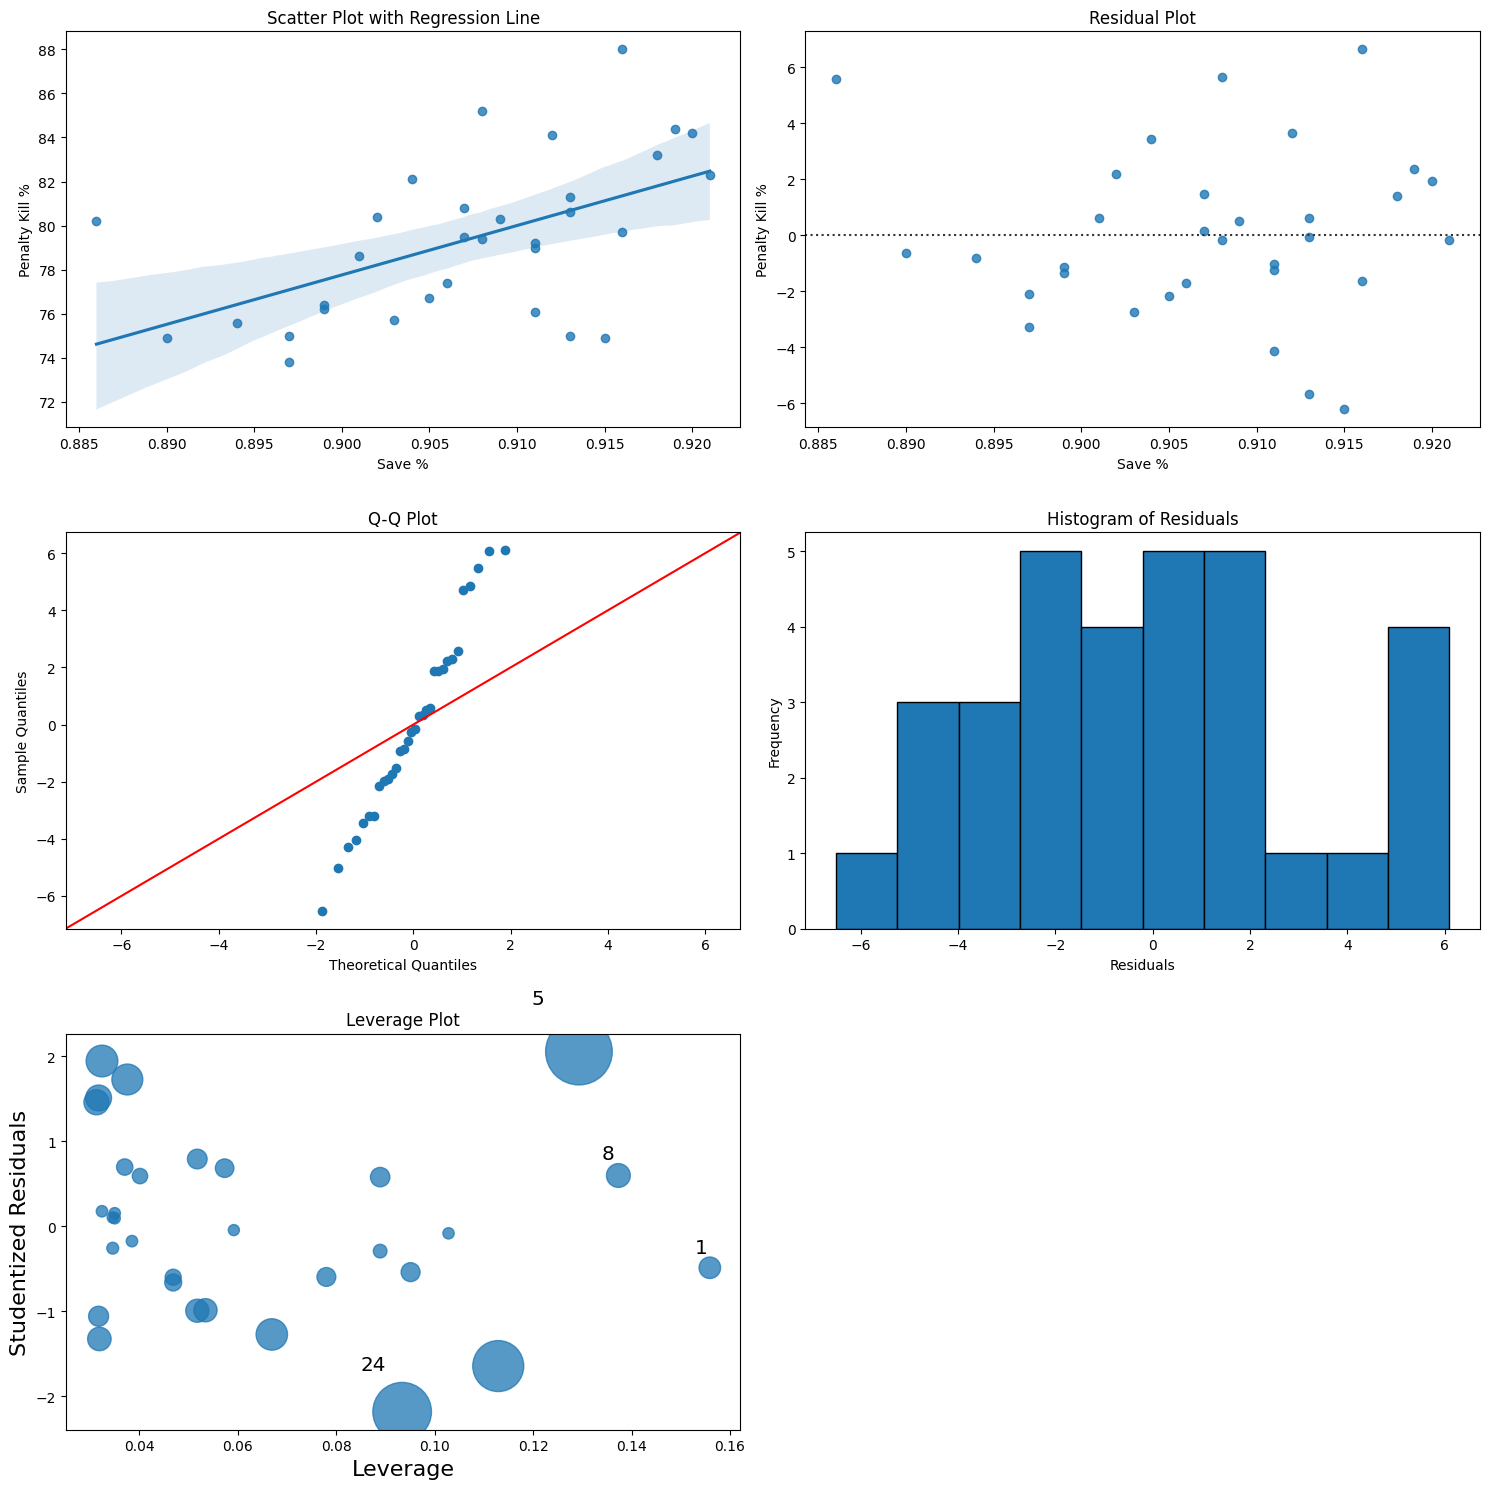

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

PP% simple regression.

In [13]:
# Define the dependent and independent variables
X = dataframe_2021_22['PP%']
y = dataframe_2021_22['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     10.04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00351
Time:                        18:38:13   Log-Likelihood:                -81.133
No. Observations:                  32   AIC:                             166.3
Df Residuals:                      30   BIC:                             169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0669      2.992     23.421      0.0

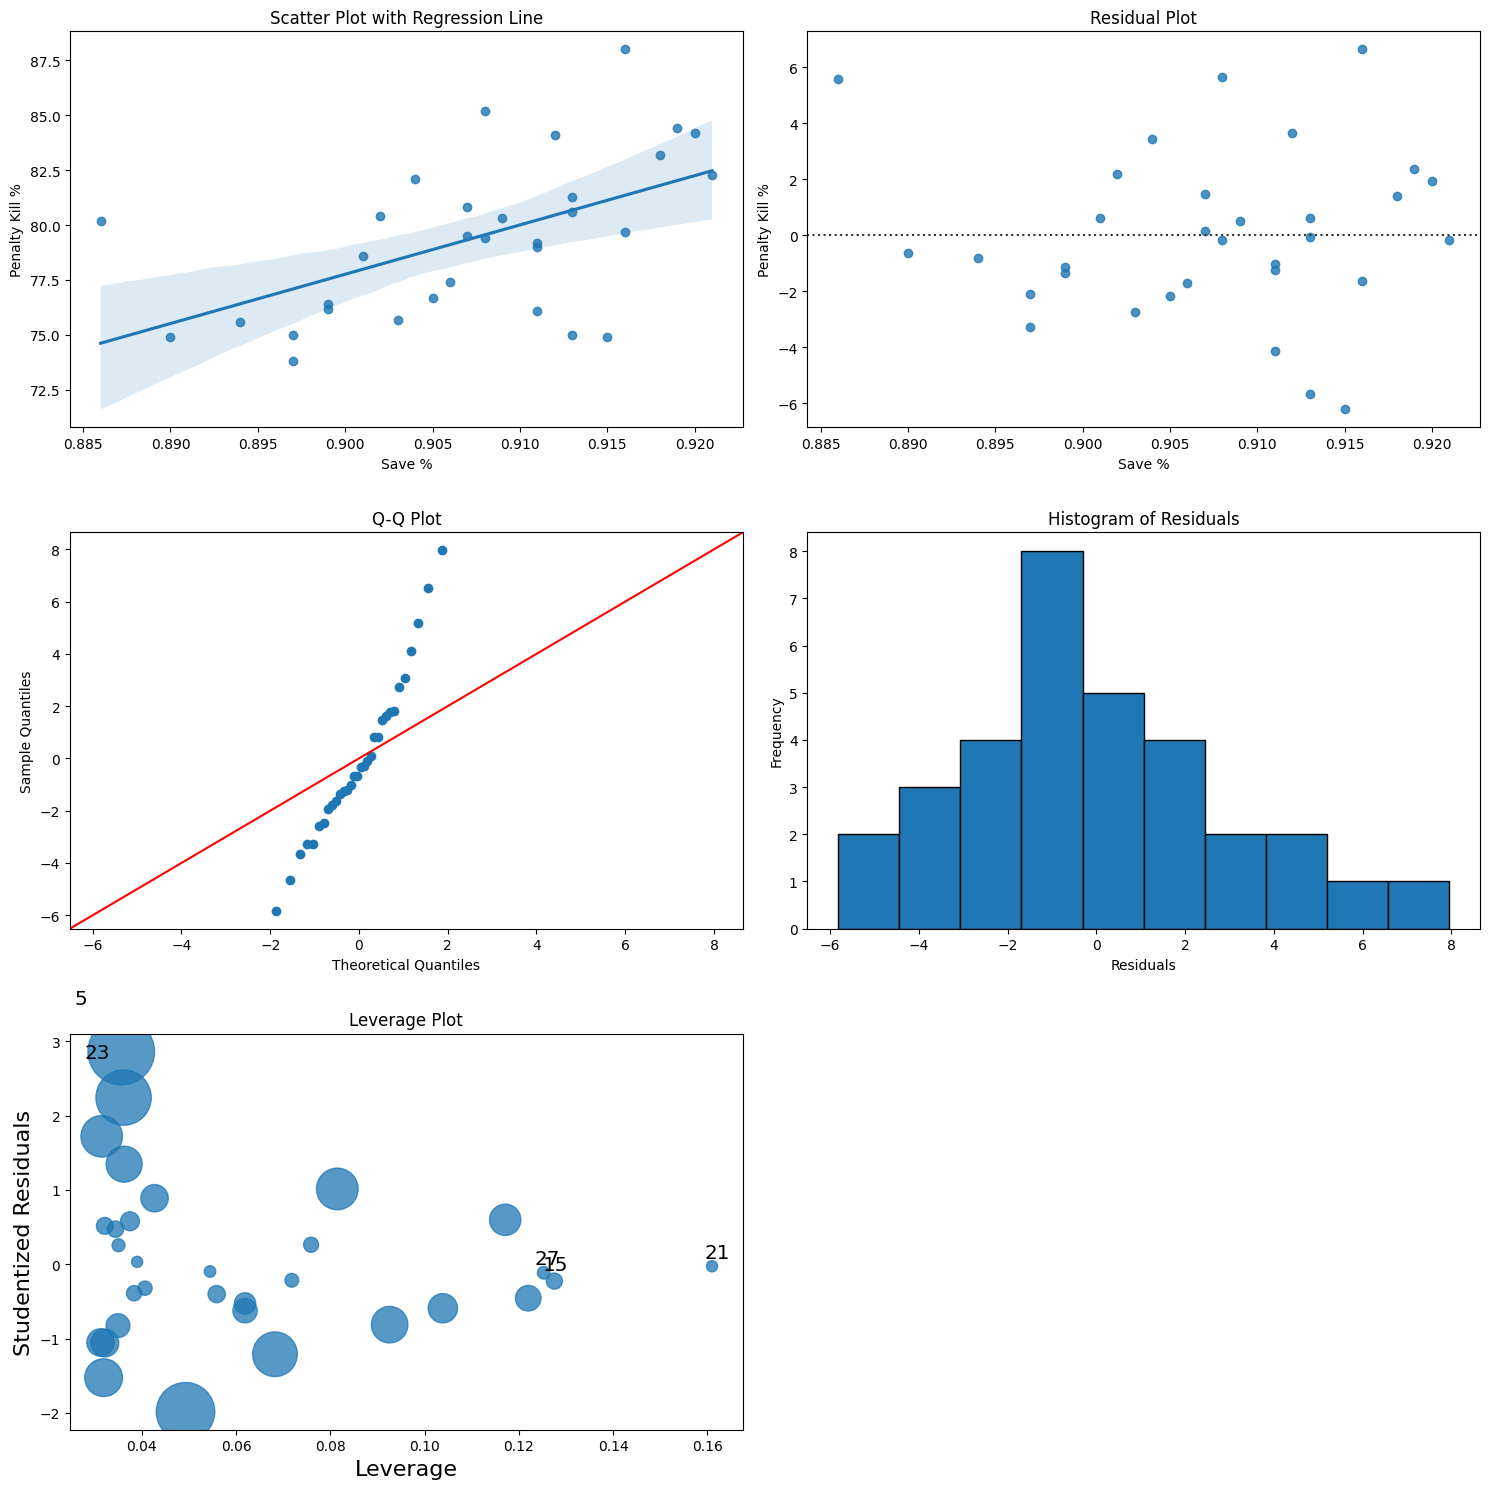

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2021_22, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()